In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import random
import tensorflow.keras as K
from tensorflow.keras.callbacks import EarlyStopping
import os

prod = pd.read_csv('data/well production.csv')

In [2]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,180.0,211.0,277.0,338.0,397.0,445.0,547.0,562.0,639.0,668.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,22.0,27.0,75.0,74.0,59.0,90.0,124.0,119.0,126.0,157.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,15.0,15.0,31.0,30.0,33.0,31.0,20.0,49.0,30.0,41.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,9.0,13.0,78.0,86.0,119.0,134.0,139.0,162.0,136.0,183.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,350.0,403.0,487.0,551.0,618.0,694.0,761.0,811.0,906.0,955.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,360.0,439.0,520.0,577.0,650.0,724.0,792.0,897.0,934.0,1017.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,54.0,86.0,93.0,84.0,135.0,169.0,162.0,211.0,216.0,275.0


In [3]:
oil = prod.filter(regex="oil.*")

In [4]:
oil

,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,oil 7,oil 8,oil 9,oil 10,oil 11,oil 12
0,862.0,824.0,759.0,728.0,661.0,601.0,542.0,493.0,392.0,376.0,299.0,271.0
1,228.0,249.0,214.0,210.0,161.0,163.0,178.0,147.0,112.0,117.0,110.0,79.0
2,67.0,85.0,73.0,73.0,57.0,58.0,55.0,57.0,68.0,38.0,58.0,47.0
3,256.0,242.0,267.0,263.0,199.0,191.0,158.0,142.0,137.0,115.0,141.0,93.0
4,23.0,29.0,31.0,50.0,72.0,52.0,61.0,45.0,27.0,36.0,18.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,981.0,921.0,873.0,821.0,737.0,673.0,606.0,530.0,463.0,413.0,318.0,269.0
96,5.0,47.0,12.0,6.0,54.0,1.0,1.0,28.0,35.0,46.0,43.0,37.0
97,1053.0,997.0,954.0,875.0,794.0,737.0,664.0,590.0,522.0,417.0,380.0,296.0
98,332.0,343.0,305.0,273.0,266.0,275.0,224.0,190.0,197.0,148.0,143.0,84.0


In [5]:
total_oil = oil.sum(axis=1)

In [6]:
total_oil

0     6808.0
1     1968.0
2      736.0
3     2204.0
4      490.0
       ...  
95    7605.0
96     315.0
97    8279.0
98    2780.0
99    4355.0
Length: 100, dtype: float64

In [7]:
prod['total oil'] = total_oil

In [8]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,total oil
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,211.0,277.0,338.0,397.0,445.0,547.0,562.0,639.0,668.0,6808.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,27.0,75.0,74.0,59.0,90.0,124.0,119.0,126.0,157.0,1968.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,15.0,31.0,30.0,33.0,31.0,20.0,49.0,30.0,41.0,736.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,13.0,78.0,86.0,119.0,134.0,139.0,162.0,136.0,183.0,2204.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,403.0,487.0,551.0,618.0,694.0,761.0,811.0,906.0,955.0,7605.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,315.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,439.0,520.0,577.0,650.0,724.0,792.0,897.0,934.0,1017.0,8279.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,86.0,93.0,84.0,135.0,169.0,162.0,211.0,216.0,275.0,2780.0


In [9]:
min_eastings = np.zeros(oil.shape[0])
max_eastings = np.zeros(oil.shape[0])
northings = np.zeros(oil.shape[0])

well_names = list(prod['well name'])
for _, row in prod.iterrows():
    idx = well_names.index(row['well name'])
    temp = pd.read_csv('data/' + row['well name'] + '.csv')

    min_eastings[idx] = temp['easting'].min()
    max_eastings[idx] = temp['easting'].max()
    northings[idx] = temp['northing'][0]

prod['min eastings'] = pd.Series(min_eastings)
prod['max eastings'] = pd.Series(max_eastings)
prod['northings'] = pd.Series(northings)


In [10]:
prod

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,water 7,water 8,water 9,water 10,water 11,water 12,total oil,min eastings,max eastings,northings
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,397.0,445.0,547.0,562.0,639.0,668.0,6808.0,78000.0,85565.0,1600.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,59.0,90.0,124.0,119.0,126.0,157.0,1968.0,88400.0,98043.0,32200.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,33.0,31.0,20.0,49.0,30.0,41.0,736.0,8200.0,19163.0,200.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,119.0,134.0,139.0,162.0,136.0,183.0,2204.0,79500.0,90164.0,31000.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0,0.0,0.0,0.0,7.0,0.0,490.0,5400.0,12676.0,79200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,618.0,694.0,761.0,811.0,906.0,955.0,7605.0,59100.0,66041.0,25400.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,4.0,0.0,0.0,0.0,0.0,0.0,315.0,15400.0,22655.0,73900.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,650.0,724.0,792.0,897.0,934.0,1017.0,8279.0,60700.0,65018.0,25600.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,135.0,169.0,162.0,211.0,216.0,275.0,2780.0,75100.0,83679.0,12900.0


In [11]:
def plot_range(x_min, x_max, y_min, y_max, res):
    slope = (y_max - y_min)/(x_max - x_min)
    interval = (x_max - x_min)/res
    x = [x_min + interval*i for i in range(res)]
    y = [y_min + slope*(x_min + interval*i) for i in range(res)]
    
    return np.array(x).flatten('F'), np.array(y).flatten('F')

[78000.   78378.25 78756.5  ... 67800.75 68065.5  68330.25]


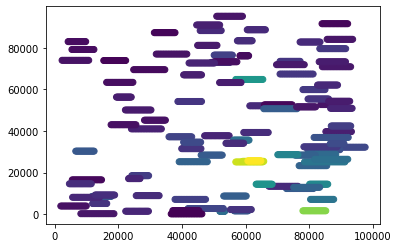

In [12]:
x, y = plot_range(prod['min eastings'], prod['max eastings'], prod['northings'], prod['northings'], 20)
print(x)
color = []
for i in prod['total oil']:
    color.append(20*[i])
plt.scatter(x, y, c=np.repeat(prod['total oil'], 20))
#plt.scatter(x, y)

Train on 5300 samples, validate on 4700 samples
Epoch 1/100
5300/5300 [==============================] - 0s 69us/sample - loss: 0.0303 - val_loss: 0.0220
Epoch 2/100
5300/5300 [==============================] - 0s 55us/sample - loss: 0.0241 - val_loss: 0.0206
Epoch 3/100
5300/5300 [==============================] - 0s 70us/sample - loss: 0.0241 - val_loss: 0.0220
Epoch 4/100
5300/5300 [==============================] - 0s 75us/sample - loss: 0.0246 - val_loss: 0.0214
Epoch 5/100
5300/5300 [==============================] - 0s 55us/sample - loss: 0.0239 - val_loss: 0.0209
Epoch 6/100
5300/5300 [==============================] - 0s 78us/sample - loss: 0.0243 - val_loss: 0.0226
Epoch 7/100
5300/5300 [==============================] - 0s 73us/sample - loss: 0.0241 - val_loss: 0.0221
Epoch 8/100
5300/5300 [==============================] - 0s 64us/sample - loss: 0.0241 - val_loss: 0.0200
Epoch 9/100
5300/5300 [==============================] - 0s 82us/sample - loss: 0.0241 - val_loss: 0.023

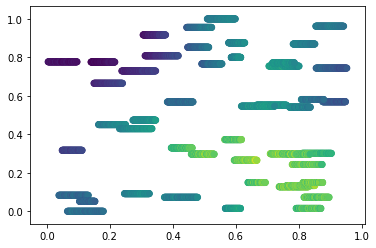

In [13]:
# this one predicts total oil production from 9 features
def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(prod.loc[prod['well name'] == i[:-4]]['total oil'])
                t_oil = np.repeat(value, len(df.index))
                df['total oil'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(prod.loc[prod['well name'] == i[:-4]]['total oil'])
                t_oil = np.repeat(value, len(df.index))
                df['total oil'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
# separates our dependent variable out
    y_train = X_train.pop('total oil')
    y_test = X_test.pop('total oil')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[9,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


In [14]:
calcs = pd.read_csv('calculations.csv')
calcs

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place,recoverable reserves
0,Brisket 1-204H.csv,33900.0,88867.87,4536.0,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.480535,21.071994,23.776265,2.697406e+05,28920.062343
1,Brisket 1-44H.csv,3900.0,6117.40,8435.0,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.401038,10.565269,11.983154,1.282571e+04,924.778262
2,Brisket 10-65H.csv,14400.0,83103.15,6006.0,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.789194,52.566181,59.177687,1.254164e+06,122174.025375
3,Brisket 2-149H.csv,62100.0,85911.09,6622.0,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.435261,20.122727,22.778994,1.156179e+05,9858.100072
4,Brisket 3-212H.csv,43000.0,21815.15,8230.0,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,71.981665,57.177338,64.579502,9.126251e+05,72551.465885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tribal 14-4H.csv,12900.0,79389.72,8579.0,54.119562,0.0814,0.02966,0.074205,7.178213e+06,0.925795,0.31488,36454201,0.102102,7.968262e+06,247.592949,101.736233,81.017334,91.376784,1.807004e+06,184499.495268
96,Tribal 2-17H.csv,18500.0,26993.19,5586.0,61.629917,0.0518,0.01107,0.149344,1.170635e+07,0.850656,0.33808,36269180,0.107993,1.321703e+07,169.120199,45.343999,36.129351,40.736675,5.364021e+05,57927.876495
97,Tribal 4-215H.csv,36900.0,87154.27,11309.0,41.954475,0.0639,0.01792,0.098403,1.060412e+07,0.901597,0.30187,34518701,0.102955,1.166731e+07,124.125748,65.426788,51.730711,58.578750,6.865331e+05,70681.782337
98,Tribal 6-134H.csv,5100.0,14239.81,4680.0,4.505779,0.0492,0.01048,0.215824,6.513093e+06,0.784176,0.34424,35955602,0.085654,7.388658e+06,21.926580,4.736385,3.735075,4.235730,3.570313e+03,305.811816


Train on 5400 samples, validate on 4600 samples
Epoch 1/100
5400/5400 [==============================] - 1s 109us/sample - loss: 0.0190 - val_loss: 0.0114
Epoch 2/100
5400/5400 [==============================] - 0s 53us/sample - loss: 0.0108 - val_loss: 0.0119
Epoch 3/100
5400/5400 [==============================] - 0s 73us/sample - loss: 0.0103 - val_loss: 0.0115
Epoch 4/100
5400/5400 [==============================] - 0s 70us/sample - loss: 0.0104 - val_loss: 0.0126
Epoch 5/100
5400/5400 [==============================] - 0s 69us/sample - loss: 0.0105 - val_loss: 0.0117
Epoch 6/100
5400/5400 [==============================] - 0s 74us/sample - loss: 0.0101 - val_loss: 0.0120
Epoch 7/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.0102 - val_loss: 0.0126
Epoch 8/100
5400/5400 [==============================] - 0s 61us/sample - loss: 0.0101 - val_loss: 0.0117
Epoch 9/100
5400/5400 [==============================] - 0s 70us/sample - loss: 0.0102 - val_loss: 0.01

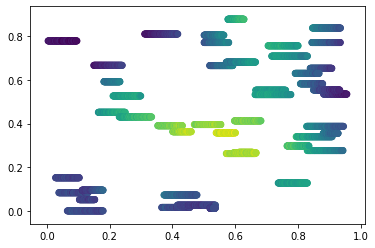

In [15]:
# this one predicts ooip from 9 features

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[9,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


Train on 5200 samples, validate on 4800 samples
Epoch 1/100
5200/5200 [==============================] - 0s 74us/sample - loss: 0.0410 - val_loss: 0.0517
Epoch 2/100
5200/5200 [==============================] - 0s 96us/sample - loss: 0.0371 - val_loss: 0.0444
Epoch 3/100
5200/5200 [==============================] - 0s 81us/sample - loss: 0.0376 - val_loss: 0.0478
Epoch 4/100
5200/5200 [==============================] - 0s 59us/sample - loss: 0.0370 - val_loss: 0.0493
Epoch 5/100
5200/5200 [==============================] - 0s 65us/sample - loss: 0.0366 - val_loss: 0.0468
Epoch 6/100
5200/5200 [==============================] - 0s 54us/sample - loss: 0.0377 - val_loss: 0.0469
Epoch 7/100
5200/5200 [==============================] - 0s 55us/sample - loss: 0.0365 - val_loss: 0.0455
Epoch 8/100
5200/5200 [==============================] - 0s 66us/sample - loss: 0.0367 - val_loss: 0.0479
Epoch 9/100
5200/5200 [==============================] - 0s 54us/sample - loss: 0.0367 - val_loss: 0.047

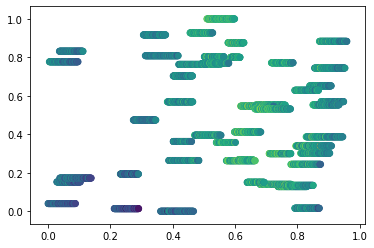

In [16]:
# this one predicts ooip from 4

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']].reset_index()
    X_test = X_test[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']].reset_index()

# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[5,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model.to_json()

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)


    easting  northing  porosity
0   28200.0   45200.0      0.04
1   28270.0   45200.0      0.04
2   28340.0   45200.0      0.04
3   28410.0   45200.0      0.06
4   28480.0   45200.0      0.03
..      ...       ...       ...
95  65487.0   64800.0      0.06
96  65577.0   64800.0      0.06
97  65668.0   64800.0      0.06
98  65758.0   64800.0      0.05
99  65848.0   64800.0      0.05

[4000 rows x 3 columns]
Train on 4000 samples, validate on 6000 samples
Epoch 1/100
4000/4000 [==============================] - 1s 164us/sample - loss: 0.0295 - val_loss: 0.0204
Epoch 2/100
4000/4000 [==============================] - 0s 79us/sample - loss: 0.0167 - val_loss: 0.0199
Epoch 3/100
4000/4000 [==============================] - 0s 86us/sample - loss: 0.0166 - val_loss: 0.0206
Epoch 4/100
4000/4000 [==============================] - 0s 117us/sample - loss: 0.0166 - val_loss: 0.0213
Epoch 5/100
4000/4000 [==============================] - 0s 79us/sample - loss: 0.0168 - val_loss: 0.0205
Epoch 6/100

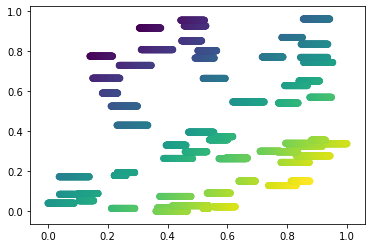

In [17]:
# Now what needs to happen is we create models for porosity and permeability in terms of easting and northing, and use that to train the dataset


def porosity_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
        
    X_train = X_train[['easting', 'northing', 'porosity']]
    X_test = X_test[['easting', 'northing', 'porosity']]

    print(X_train)
# separates our dependent variable out
    y_train = X_train.pop('porosity')
    y_test = X_test.pop('porosity')
    
    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    #X_train.drop('index')
    #X_test.drop('index')
    
    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)


porosity = porosity_model(optimizer, .5, 100, 10, 10, 10, 5)



Train on 5400 samples, validate on 4600 samples
Epoch 1/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.0158 - val_loss: 0.0137
Epoch 2/100
5400/5400 [==============================] - 0s 57us/sample - loss: 0.0155 - val_loss: 0.0135
Epoch 3/100
5400/5400 [==============================] - 0s 69us/sample - loss: 0.0151 - val_loss: 0.0143
Epoch 4/100
5400/5400 [==============================] - 0s 53us/sample - loss: 0.0150 - val_loss: 0.0155
Epoch 5/100
5400/5400 [==============================] - 0s 55us/sample - loss: 0.0151 - val_loss: 0.0171
Epoch 6/100
5400/5400 [==============================] - 0s 53us/sample - loss: 0.0152 - val_loss: 0.0139
Epoch 7/100
5400/5400 [==============================] - 0s 70us/sample - loss: 0.0150 - val_loss: 0.0141
Epoch 8/100
5400/5400 [==============================] - 0s 54us/sample - loss: 0.0148 - val_loss: 0.0141
Epoch 9/100
5400/5400 [==============================] - 0s 53us/sample - loss: 0.0150 - val_loss: 0.014

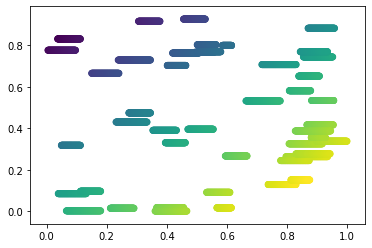

In [18]:
def permeability_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'permeability']]
    X_test = X_test[['easting', 'northing', 'permeability']]

# separates our dependent variable out
    y_train = X_train.pop('permeability')
    y_test = X_test.pop('permeability')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())

    #X_train.drop('index')
    #X_test.drop('index')
    
    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[2,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

optimizer = K.optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=.999, amsgrad=False)


permeability = permeability_model(optimizer, .5, 100, 10, 10, 10, 5)


       easting     index  northing  permeability  porosity
0     0.853936  0.000000  0.962145      0.375140  0.377166
1     0.854831  0.010101  0.962145      0.375608  0.377636
2     0.855715  0.020202  0.962145      0.376070  0.378100
3     0.856609  0.030303  0.962145      0.376538  0.378570
4     0.857504  0.040404  0.962145      0.377005  0.379040
...        ...       ...       ...           ...       ...
4495  0.615885  0.959596  0.373291      0.634162  0.634381
4496  0.616426  0.969697  0.373291      0.634445  0.634665
4497  0.616966  0.979798  0.373291      0.634728  0.634949
4498  0.617507  0.989899  0.373291      0.635011  0.635233
4499  0.618038  1.000000  0.373291      0.635288  0.635511

[4500 rows x 5 columns]


/home/nihal/classes/fri/virtualea/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Train on 4500 samples, validate on 5500 samples
Epoch 1/100
4500/4500 [==============================] - 1s 118us/sample - loss: 0.0912 - val_loss: 0.0522
Epoch 2/100
4500/4500 [==============================] - 0s 63us/sample - loss: 0.0516 - val_loss: 0.0534
Epoch 3/100
4500/4500 [==============================] - 0s 62us/sample - loss: 0.0519 - val_loss: 0.0576
Epoch 4/100
4500/4500 [==============================] - 0s 62us/sample - loss: 0.0518 - val_loss: 0.0551
Epoch 5/100
4500/4500 [==============================] - 0s 79us/sample - loss: 0.0519 - val_loss: 0.0542
Epoch 6/100
4500/4500 [==============================] - 0s 64us/sample - loss: 0.0517 - val_loss: 0.0546
Epoch 7/100
4500/4500 [==============================] - 0s 62us/sample - loss: 0.0516 - val_loss: 0.0529
Epoch 8/100
4500/4500 [==============================] - 0s 62us/sample - loss: 0.0518 - val_loss: 0.0548
Epoch 9/100
4500/4500 [==============================] - 0s 93us/sample - loss: 0.0517 - val_loss: 0.05

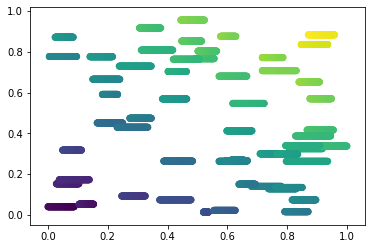

In [19]:
# this one trains on the predicted permeability and porosity from the models

def run_model(opt, split, epochs_, first, *args):
# loads all well log data into a list
    X_train = []
    X_test = []
    for i in os.listdir("data"):
        if i != 'well production.csv':
            if random.randint(0, 1):
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_train.append(df)
            else:
                df = pd.read_csv('data/' + i)
                value = np.array(calcs.loc[calcs['Name'] == i]['original oil in place'])
                t_oil = np.repeat(value, len(df.index))
                df['original oil in place'] = t_oil
                X_test.append(df)
                
# combines all well log data into a dataframe
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
        
# removes columns that might be redundant/problematic
    #X_train = X_train.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    #X_test = X_test.drop(columns=['water saturation', 'proppant weight (lbs)', 'pump rate (cubic feet/min)']).reset_index()
    
    X_train = X_train[['easting', 'northing', 'original oil in place']]
    X_train['permeability'] = permeability.predict(X_train[['easting', 'northing']])
    X_train['porosity'] = porosity.predict(X_train[['easting', 'northing']])
    
    X_test = X_test[['easting', 'northing', 'original oil in place', 'porosity', 'permeability']]
    X_test['permeability'] = permeability.predict(X_test[['easting', 'northing']])
    X_test['porosity'] = porosity.predict(X_test[['easting', 'northing']])
    
# separates our dependent variable out
    y_train = X_train.pop('original oil in place')
    y_test = X_test.pop('original oil in place')

    #normalize
    X_temp = X_train.append(X_test)
    X_train = (X_train - X_temp.min())/(X_temp.max() - X_temp.min())
    X_test = (X_test - X_temp.min())/(X_temp.max() - X_temp.min())
    
    print(X_train)

    y_temp = y_train.append(y_test)
    y_train = (y_train - y_temp.min())/(y_temp.max() - y_temp.min())
    y_test = (y_test - y_temp.min())/(y_temp.max() - y_temp.min())
    
# sets up our the neural network
    model = K.models.Sequential([K.layers.Dense(first, input_shape=[5,])])

    for i in args:
        model.add(K.layers.Dense(i))

    model.add(K.layers.Dense(1))

    #model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    model.compile(optimizer=opt, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=100, patience=10,
            restore_best_weights=True)

# fits model to data
    history = model.fit(X_train, y_train, epochs=epochs_, validation_data=(X_test, y_test), callbacks=[early_stopping])
    y_pred = model.predict(X_test).transpose()[0]
    
    plt.scatter(X_test['easting'], X_test['northing'], c=y_pred)
#    plt.scatter(X_test['easting'], X_test['northing'])

    return model

info = run_model(optimizer, .5, 100, 10, 10, 10, 5)
